# Supervised Learning : Lesson 1 - Linear Regression with MSE and Gradient Descent

## Loading and studying the dataset 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head() # viewing the first 5 rows of the dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
df.info() # getting some info about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


The data frame has no null values and all the columns are numerical . Which is GREAT! So we don't need much of a cleaning here. But we will still check for duplicates . To talk about outliers , we will do that in later of the notebooks.

In [ ]:
cols = df.columns ## you can also use df.keys()
print(cols)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [13]:
df_small = df[['Avg. Area Income','Price']]

In [14]:
df_small.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


Now we have a small dataframe with only two columns. This will help us to visualize the data better and apply the maths more cleanly to understand the concepts better.

In [17]:
df_small.describe()

,Avg. Area Income,Price
count,5000.000000,5.000000e+03
mean,68583.108984,1.232073e+06
std,10657.991214,3.531176e+05
min,17796.631190,1.593866e+04
25%,61480.562388,9.975771e+05
50%,68804.286404,1.232669e+06
75%,75783.338666,1.471210e+06
max,107701.748378,2.469066e+06


Now we will plot a scatter plot to visualize the data. 

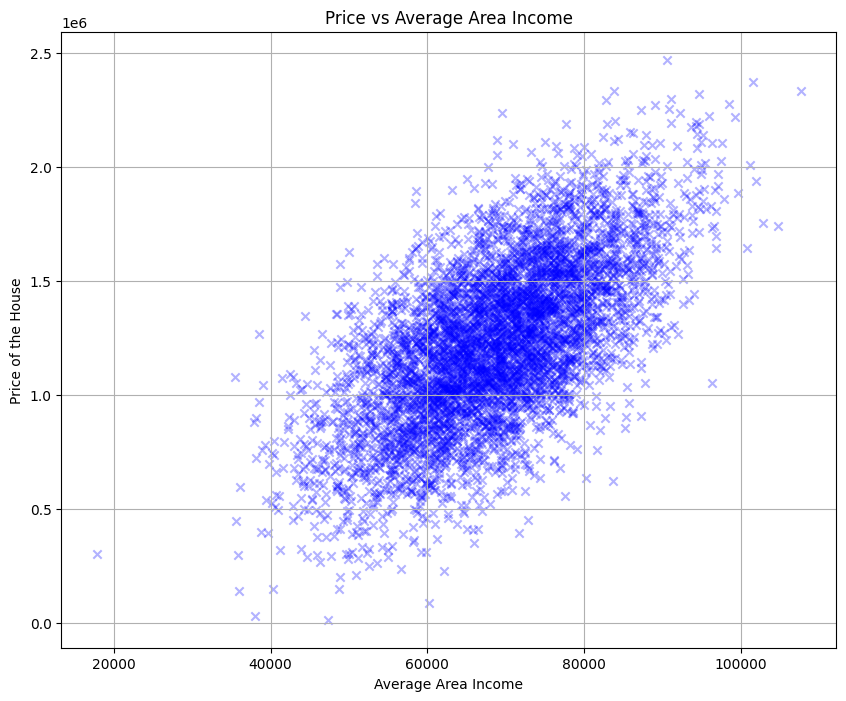

In [24]:
## First we create a figure and an axis object on which we will plot the data

fig, ax = plt.subplots(figsize = (10,8))
x,y = df_small['Avg. Area Income'], df_small['Price']
ax.scatter(x,y , color = 'blue' , marker = 'x' ,alpha = 0.3)
ax.set_xlabel('Average Area Income')
ax.set_ylabel('Price of the House')
ax.set_title('Price vs Average Area Income')
ax.grid(True)
plt.show()

Here you can see a very clear scatter plot of the data with Average Area Income on the x-axis and Price of the house on the y-axis. We can see that there is a positive correlation between the two variables. As the Average Area Income increases, the Price of the house also increases. This is a good indication that we can use Average Area Income to predict the Price of the house using a linear regression model.

*Note*: Since we can see there is a positive correlation between the two variables, we can use Average Area Income to predict the Price of the house using a linear regression model.

## Applying Linear Regression to the dataset 

In [ ]:
# First step of building any ML model is to split the data into training and testing sets.

X = df_small[['Avg. Area Income']].to_numpy().reshape(-1,1) # Shape(N(samples),1(features))
y = df_small['Price'].to_numpy().reshape(-1,1) # Shape(N(sampels),1(target))

In [95]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [96]:
y

array([[1059033.55787012],
       [1505890.91484695],
       [1058987.98787608],
       ...,
       [1030729.58315229],
       [1198656.87240769],
       [1298950.48026696]])

In [97]:
# checking the shape of the X and Y arrays
X.shape , y.shape

((5000, 1), (5000, 1))

X.shape : (5000, 1) reperesents 5000 samples and 1 feature

y.shape : (5000, 1) represents 5000 samples and 1 target column

In [118]:
# Scale feature
## We do this to prevent the gradient from overshooting and going to infinity 
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale target (optional but helps here because it's ~1e6 range)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Add bias column
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

In [99]:
X_b.shape

(5000, 2)

In [100]:
X_b[:5]

array([[ 1.        ,  1.02865969],
       [ 1.        ,  1.00080775],
       [ 1.        , -0.68462916],
       [ 1.        , -0.49149907],
       [ 1.        , -0.80707253]])

As you can see a bias term as a column is added to the feature matrix X

### Splitting the dataset

In [101]:
# Now we will split the dataset into training and testing sets

rng = np.random.default_rng(seed=42) # creating a random number generator object
idx = rng.permutation(X_b.shape[0]) # generating a random permutation of indices
train_ratio = 0.8

In [102]:
rng # creating a random number generator object

Generator(PCG64) at 0x1B0D6711000

In [103]:
idx # generates a random permutation of indices from 0 to 4999

array([1535, 1183, 3378, ..., 2189, 4802, 1672])

In [104]:
train_samples = int(train_ratio * X_b.shape[0]) # number of trianing samples

In [105]:
train_samples

4000

In [106]:
train_idx, test_idx = idx[:train_samples], idx[train_samples:] # splitting the indices into training and testing sets
X_b_train, y_train = X_b[train_idx], y[train_idx]
X_b_test,  y_test  = X_b[test_idx],  y[test_idx]

In [107]:
x_train = X_b_train[:, 1:2]
mu, sigma = x_train.mean(axis=0), x_train.std(axis=0) + 1e-8
X_b_train[:, 1:2] = (x_train - mu) / sigma

x_test = X_b_test[:, 1:2]
X_b_test[:, 1:2] = (x_test - mu) / sigma

print(X_b_train.shape, y_train.shape, X_b_test.shape, y_test.shape)

(4000, 2) (4000, 1) (1000, 2) (1000, 1)


In [108]:
X_b_train = X_b[idx[:train_samples]]
y_train = y[idx[:train_samples]]

In [109]:
X_b_train.shape

(4000, 2)

In [110]:
y_train.shape

(4000, 1)

### Creating hypothesis function

In [ ]:
# h(theta) = X_b * theta

def hypothesis(Xb, theta):
    return Xb @ theta

# Cost function 
def mse(Xb, y, w):
    y_pred = hypothesis(Xb, w)
    return np.mean((y_pred - y) ** 2) / 2


# Gradient  function
def gradient(Xb , y , w):
    m = len(y)
    return (Xb.T @ (hypothesis(Xb,w) - y)) / m


    

In [112]:
# --------------Gradient Descent Variants-----------------
from tqdm import trange

def batch_gd(Xb, y , lr = 0.01 , epochs = 1000):
    theta = np.zeros((Xb.shape[1],1))
    loses = []
    for epoch in trange(epochs, desc = 'Batch GD'):
        grad = gradient(Xb,y,theta)
        theta = theta - lr * grad
        cost = mse(Xb,y,theta)
        loses.append(cost)
    return theta , loses

def sgd(Xb , y , lr= 0.01 , epochs = 1000):
    theta = np.zeros((Xb.shape[1],1))
    loses = []
    m = len(y)
    for epoch in trange(epochs, desc = 'SGD'):
        for i in range(m):
            xi = Xb[i].reshape(1,-1)
            yi = y[i].reshape(1,-1)
            grad = gradient(xi,yi,theta)
            theta = theta - lr * grad
        cost = mse(Xb,y,theta)
        loses.append(cost)
    return theta , loses


def minibatch_gd(Xb, y, lr=0.01, epochs=1000, batch_size=32):
    w = np.random.randn(Xb.shape[1], 1)
    losses = []
    m = len(y)
    for _ in trange(epochs, desc="Mini-batch GD"):
        indices = np.random.permutation(m)
        for start in range(0, m, batch_size):
            idx = indices[start:start+batch_size]
            Xb_batch, y_batch = Xb[idx], y[idx]
            grad = gradient(Xb_batch, y_batch, w)
            w -= lr * grad
        losses.append(mse(Xb, y, w))
    return w, losses

In [113]:
### Defining evalauation matrix 

def evaluate(Xb, y, w):
    y_pred = hypothesis(Xb, w)
    mse_val = np.mean((y_pred - y)**2)
    mae_val = np.mean(np.abs(y_pred - y))
    r2_val = 1 - np.sum((y - y_pred)**2)/np.sum((y - y.mean())**2)
    return {"MSE": mse_val, "MAE": mae_val, "R2": r2_val}


Mini-batch GD: 100%|██████████| 200/200 [00:00<00:00, 1148.51it/s]


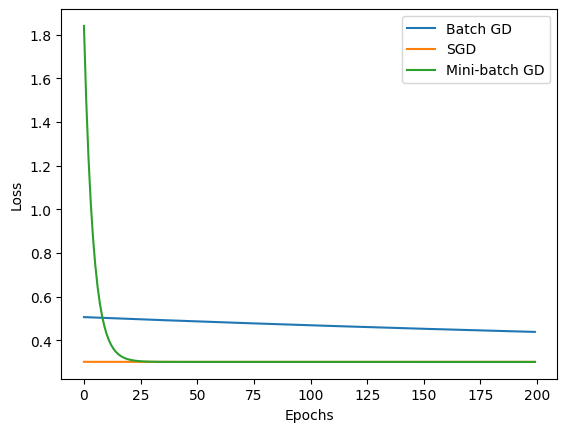

          Method       MSE       MAE        R2  Time (s)
0       Batch GD  0.814165  0.720036  0.139106  0.008920
1            SGD  0.545977  0.595696  0.422686  3.606542
2  Mini-batch GD  0.545069  0.594911  0.423646  0.180919


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt

results = []

# Batch GD
start = time.time()
w_batch, loss_batch = batch_gd(X_b_train, y_train, lr=0.001, epochs=200)
end = time.time()
eval_batch = evaluate(X_b_test, y_test, w_batch)
results.append(["Batch GD", eval_batch["MSE"], eval_batch["MAE"], eval_batch["R2"], end - start])

# SGD
start = time.time()
w_sgd, loss_sgd = sgd(X_b_train, y_train, lr=0.001, epochs=200)
end = time.time()
eval_sgd = evaluate(X_b_test, y_test, w_sgd)
results.append(["SGD", eval_sgd["MSE"], eval_sgd["MAE"], eval_sgd["R2"], end - start])

# Mini-batch GD
start = time.time()
w_mini, loss_mini = minibatch_gd(X_b_train, y_train, lr=0.001, epochs=200, batch_size=32)
end = time.time()
eval_mini = evaluate(X_b_test, y_test, w_mini)
results.append(["Mini-batch GD", eval_mini["MSE"], eval_mini["MAE"], eval_mini["R2"], end - start])

# Plot losses
plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_mini, label="Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Results table
df_results = pd.DataFrame(results, columns=["Method", "MSE", "MAE", "R2", "Time (s)"])
print(df_results)


Mini-batch GD seems to be the best compromise between speed and performance.If we train for more the results will improve further.

Mini-batch GD: 100%|██████████| 1000/1000 [00:00<00:00, 1110.74it/s]


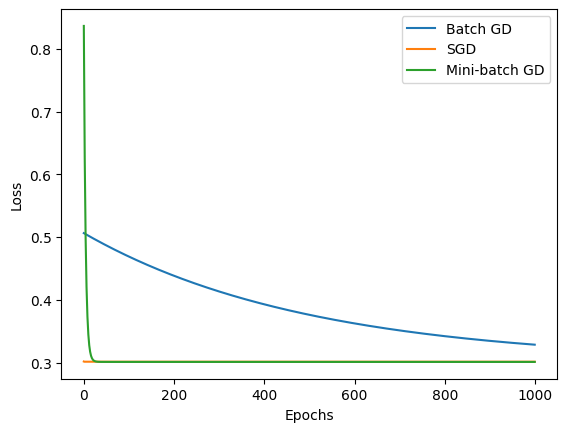

          Method       MSE       MAE        R2   Time (s)
0       Batch GD  0.599815  0.624936  0.365758   0.026416
1            SGD  0.545977  0.595696  0.422686  17.668232
2  Mini-batch GD  0.545068  0.594911  0.423647   0.903366


In [116]:
import time
import pandas as pd
import matplotlib.pyplot as plt

results = []

# --- Batch GD
start = time.time()
w_batch, loss_batch = batch_gd(X_b_train, y_train, lr=0.001, epochs=1000)
end = time.time()
eval_batch = evaluate(X_b_test, y_test, w_batch)
results.append(["Batch GD", eval_batch["MSE"], eval_batch["MAE"], eval_batch["R2"], end - start])

# --- SGD
start = time.time()
w_sgd, loss_sgd = sgd(X_b_train, y_train, lr=0.001, epochs=1000)
end = time.time()
eval_sgd = evaluate(X_b_test, y_test, w_sgd)
results.append(["SGD", eval_sgd["MSE"], eval_sgd["MAE"], eval_sgd["R2"], end - start])

# --- Mini-batch GD
start = time.time()
w_mini, loss_mini = minibatch_gd(X_b_train, y_train, lr=0.001, epochs=1000, batch_size=32)
end = time.time()
eval_mini = evaluate(X_b_test, y_test, w_mini)
results.append(["Mini-batch GD", eval_mini["MSE"], eval_mini["MAE"], eval_mini["R2"], end - start])

# --- Plot losses
plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_mini, label="Mini-batch GD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# --- Results table
df_results = pd.DataFrame(results, columns=["Method", "MSE", "MAE", "R2", "Time (s)"])
print(df_results)


👉 A quick check for you:
Looking at these results, which method would you prefer to use if you had a dataset with millions of rows? Why?

(ANSWER)